In [ ]:
From-Towards Data science-using diabetes dataset of scikit learn

In [23]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [15]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [24]:
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(y_test, predictions))

Coefficients: 
 [ -41.16441745 -191.87480385  516.56620026  323.72189088 -878.38908555
  530.73798747  171.22583192  210.34360264  799.09326182   60.98631883]
Mean squared error: 2381.86
Variance score: 0.56


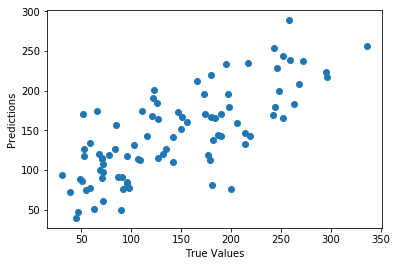

In [30]:

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
#plt.xticks(())
#plt.yticks(())
plt.show()

In [9]:
#accuracy score
print("Score:", model.score(X_test, y_test))


Score: 0.564924940278


Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [37]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)


Cross-validated scores: [ 0.4554861   0.46138572  0.40094084  0.55220736  0.43942775  0.56923406]


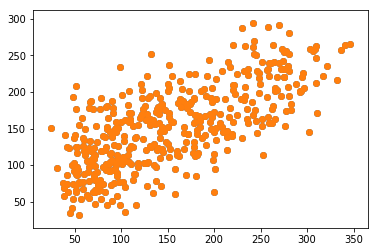

In [39]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
plt.show()#6 times as many points as before because cv=6

In [41]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)


Cross-Predicted Accuracy: 0.490806583864
